# Adult Dataset
- [source](http://archive.ics.uci.edu/ml/datasets/Adult)

In [1]:
import pandas 
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  
plt.rcParams['figure.figsize'] = [10, 5]

In [6]:
dataset = pandas.read_csv ( os.getcwd() + '\\adult.data', index_col=False) 
dataset.head()

,age,workclass,weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Visualization

#### Age

In [35]:
age_df = pandas.DataFrame ( dataset['weight'] )
age_df['ages'] = dataset['age'] - dataset['age'] % 5
age_df['rich'] = dataset['weight'] * (dataset['income']==' >50K').astype(int)
age_df['notrich'] =  dataset['weight'] *  (age_df['rich']==False).astype(int)

age_df = age_df.groupby(age_df['ages']).aggregate({'weight': 'sum', 'rich': 'sum', 'notrich': 'sum'})


In [39]:
age_df

,weight,rich,notrich
ages,,,
15,325622019,524395,325097624
20,792908630,12601085,780307545
25,808040274,87561949,720478325
30,848301234,191677195,656624039
35,820863293,256073835,564789458
40,724627267,260604996,464022271
45,608752160,246138645,362613515
50,450749301,185179075,265570226
55,342111545,121492989,220618556


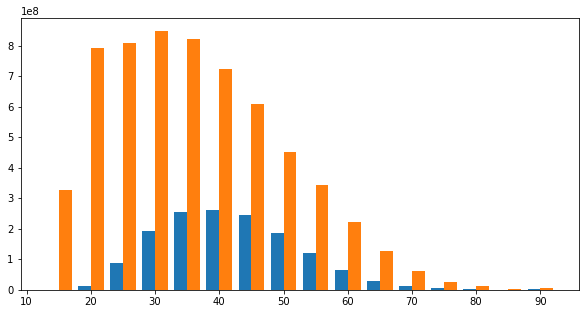

In [56]:
# The number of people making over 50K vs the total number in the age range 
# Seems like you make your max earnings at 40ish years old
ax = plt.subplot(111)
ax.bar(age_df.index-1, age_df['rich'], width=2)
ax.bar(age_df.index+1, age_df['weight'], width=2)
plt.show()

#### Capital Gains

In [65]:
age_df = pandas.DataFrame ( dataset['weight'] )
age_df['ages'] = dataset['age'] - dataset['age'] % 5
age_df['gains'] = dataset['weight'] * dataset['capital-gain']
age_df['loss'] = dataset['weight'] * dataset['capital-loss']
age_df['net'] = age_df['gains'] + age_df['loss']

age_df = age_df.groupby(age_df['ages']).aggregate({'weight': 'sum', 'gains': 'sum', 'loss' : 'sum', 'net' : 'sum'})
age_df['gains'] = age_df['gains']/age_df['weight']
age_df['loss'] = age_df['loss']/age_df['weight']
age_df['net'] = age_df['net']/age_df['weight']


In [66]:
age_df

,weight,gains,loss,net
ages,,,,
15,325622019,119.646611,46.389608,166.036219
20,792908630,227.795208,32.116791,259.911998
25,808040274,344.747667,55.207050,399.954717
30,848301234,782.901254,86.936360,869.837614
35,820863293,1258.574848,93.268238,1351.843086
40,724627267,1433.900240,114.121400,1548.021640
45,608752160,1885.830870,113.855739,1999.686609
50,450749301,1959.523226,114.991467,2074.514692
55,342111545,1803.886846,112.406600,1916.293446


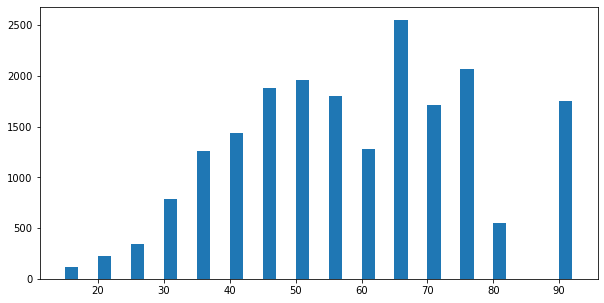

In [73]:
# Data is not complete, but you can see there is a upward growth well into the late ages in terms of capital gains
ax = plt.subplot(111)
ax.bar(age_df.index+1, age_df['gains'], width=2)
plt.show()

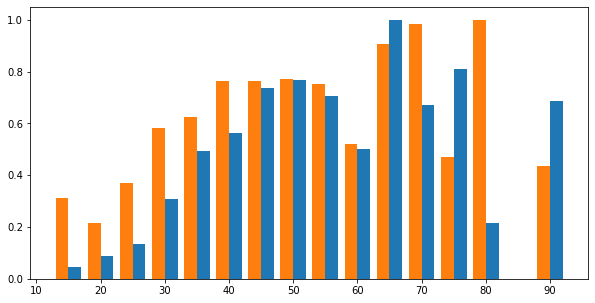

In [74]:
# When adding in losses and normalizing the data, its clear that when you gain more you also loose more
# But also, younger people have a disproportionate amount of the losses compaired the gians
# Investing might come with expierience.
ax = plt.subplot(111)
ax.bar(age_df.index+1, age_df['gains']/age_df['gains'].max(), width=2)
ax.bar(age_df.index-1, age_df['loss']/age_df['loss'].max(), width=2)
plt.show()